<h1><center>Laboratorio 4: El Pandas no muerde (act. II) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matías Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Camila Pinto


### **Link de repositorio de GitHub:** https://github.com/Camipinto/Laboratorio-de-Programacion-Cientifica-para-Ciencia-de-Datos

# Temas a tratar

- Manejo de datos tabulares usando `pandas`. En esta segunda parte se incluye adicionalmente agregaciones, concatenaciones, merge y trabajo con strings.
- Visualizaciones interactivas de los datos con `plotly`.

### Reglas:

- Fecha de entrega: 5 de mayo (atrasos hasta el 8 de mayo, 1 punto de descuento por día)
- **Grupos de máximo 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas`.
- Utilizar `plotly` para obtener información gráfica del dataset.
- Aplicar el **Análisis Exploratorio de Datos** a un caso en particular.


> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# Importamos librerias utiles 😸

In [37]:
# Libreria Core del lab.
import numpy as np
import pandas as pd 

from IPython.display import display

#Libreria para visualizar
#!pip install --upgrade plotly
import plotly.figure_factory as ff
import plotly.express as px

# 1. Rendimiento en Estudiantes 📚


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1hZZaPQlZe4VupFOXt76_wjuUA5NpUhrw" width="300" height="300">
</p>

Para este laboratorio deberán continuar el Análisis Exploratorio de datos sobre el conjunto ```students_grades```, el cual contiene una caracterización sobre el rendimiento y otros atributos de cada alumno de la *Universidad de la Cachaña* .

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


##  Carga de Datos [0.5 Puntos]

Ya finalizado en análisis inicial, ud. y su equipo le entregaron a *Don Caguayo* (rector de la Universidad de la Cachaña) tanto los resultados del análisis como también la base de datos limpia y lista para ser almacenada. Dada la ingente cantidad de los datos, el equipo de TI de la universidad resolvió separar el dataset en dos bases de datos distintas (lo que según argumentan ellos, permitiría hacer agregaciones de forma más eficiente). 

Gracias a la excelente labor de ud. y su equipo en el análisis previo, el rector le solicita continuar el trabajo con una nueva batería de análisis. Por este motivo, la sección de TI les entrega nuevamente los datos. Sin embargo, argumentan que dada una escazes de personal, solo le entregarán *dumps* (copias) de cada base de datos y su equipo deberá unir las bases de datos. Los datos se encuentran en los siguiente archivos `.json`: `students_grades_1.json` y `students_grades_2.json`. 


Por ende, ud. y su equipo deciden que la primera tarea se centrará en cargar estos datos y unirlos. 

**No se preocupe por la limpieza ni transformar el tipo de datos de las columnas, ni tampoco transformar a notas chilenas**, recuerde que anteriormente ya se encargo de este tema.

In [39]:
df_1 = pd.read_json('students_grades_1.json')
df_2 = pd.read_json('students_grades_2.json')

df_grades = pd.concat([df_1, df_2], axis=0, ignore_index=True)

Resultado esperado:

In [ ]:
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22
...,...,...,...,...,...,...,...,...,...
470,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26
471,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16
472,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86
473,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72


## 1.2- Análisis de Las Notas v2 [2 Punto por Gráficos + 0.5 respuesta]

Preocupado por la dificultad que representa el graficar correctamente las notas, el rector le solicita implementar distintas alternativas de visualización.

Para esto, genere un [boxplot](https://plotly.com/python/box-plots/), un [displot](https://plotly.com/python/distplot/#distplot-with-pandas), un [histograma con un gráfico marginal de caja](https://plotly.com/python/histograms/#visualizing-the-distribution) y un [histograma con el ramo como faceta de fila](https://plotly.com/python/facet-plots/#histogram-facet-grids) que permitan visualizar las notas.

Luego, responda las siguientes pregunta: 

> 1. ¿Existe una diferencia notable entre las notas?

> 2. ¿Cuál de los gráficos mostrados cree que es adecuado para mostrarle al rector? ¿Y a los padres? ¿Y a un centro de estudios educativos? ¿Por qué?. Base sus respuestas en lo visto en la clase de visualizaciones como también en lo que usted y su equipo consideren correcto.

> Hint: Para elaborar el histograma, puede que le sea de utilidad hacer un `melt` del DataFrame, dejando como variables los ramos y valores las notas. Por otra parte, visiten la documentación para generar los gráficos.

In [9]:
#version anterior. ESTO NO
#df_grades['id'] = df_grades.index
#df_melt = pd.melt(df_grades, id_vars=['id'], value_vars=['math score', 'reading score', 'writing score'], var_name = 'subject') 

In [65]:
subjects = ['math score','reading score', 'writing score']
df_melt = df_grades[subjects].melt(var_name="subject", value_name="score")

,subject,score
0,math score,3.22
1,math score,5.80
2,math score,5.38
3,math score,5.86
4,math score,6.64
...,...,...
2620,writing score,5.26
2621,writing score,3.16
2622,writing score,5.86
2623,writing score,4.72


**Gráfico de Caja:**

In [5]:
fig = px.box(df_melt, y='score', color='subject')
fig.show()

**Distplot:**

In [6]:
fig = ff.create_distplot([df_grades['math score'],df_grades['reading score'],df_grades['writing score']], group_labels = ['math score','reading score','writing score'], show_hist = False, show_rug=False)
fig.show()

**Histograma con Boxplots:**

In [7]:
fig = px.histogram(df_grades, x=['math score','reading score', 'writing score'], marginal = 'box',barmode='group', nbins = 20)
fig.show()

**Histograma con Faceta:**

In [9]:
px.histogram(df_melt, x='score', facet_row='subject', color = 'subject', nbins = 20)

**Resultados Esperados:**

¿Existe una diferencia notable entre las notas?

¿Cuál de los gráficos mostrados cree que es adecuado para mostrarle al rector? ¿Y a los padres? ¿Y a un centro de estudios educativos? ¿Por qué?. Base sus respuestas en lo visto en la clase de visualizaciones como también en lo que usted y su equipo consideren correcto.

**Justifique:**



A partir del boxplot y del displot se puede ver que las notas para los 3 ramos distribuyen muy parecido, es decir no hay ningún ramo que destaque en rendimiento. 
Los gráficos no muestran diferencias significativas entre las notas 
Sin embargo, a partir del histograma con boxplots se puede ver claramente que el ramo con mejor promedio de notas es lectura y el ramo con peor promedio de notas es matemática

El gráfico más adecuado para mostrarle al rector y a un centro educativo es el histograma con boxplots, ya que este muestra la distribución de notas de los alumnos desagregado por ramo (se ve claramente en qué notas se concentra el rendimiento de los alumnos) además se puede ver la nota mínima, máxima, media y outliers por ramo.
Este es el gráfico que más información nos entrega sobre las notas.

Por simplicidad de interpretación a los padres sería mejor mostrarles el histograma con faceta, para que comprendan rápidamente donde se concentran las notas de los alumnos por ramo.

# 2. Análisis por Nivel Educacional Etnia de los Padres

El rector, basado en su experiencia, cree fuertemente que el nivel educacional y la etnia de los padres influyen en las notas que obtienen sus hijos. 
Como científicos de datos, ud. y su equipo creen que deben encontrar evidencia para confirmar o refutar la hipótesis del rector.

Para esto, deciden generar dos análisis: una tabla de resumen por una parte y gráficos de caja por otro.

### 1.3.4 Tabla de Resumen [1 punto]

Para generar la tabla de resumen:

- [ ] Calcular el promedio de las notas y guardarlo en una variable `GPA` (grade point average).
- [ ] Hacer una simplificación a través de un mapeo (investigar el método `map()`) de la variable `parental level of education`  según la siguiente conversión: 

        some high school -> school
        some college -> school
        high school -> school
        bachelor's degree -> college
        associate's degree -> college
        master's degree -> postgraduate

  Los resultados de este mapeo deben ser guardados en la columna `simple parental level of education`.


- [ ] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener el promedio de las notas. 
- [ ] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener un conteo de los alumnos en cada grupo y agregarlos como una nueva fila count.
- [ ] Obtener el porcentaje de alumnos con respecto al total. Los porcentajes deben ser strings que contienen la frecuencia de cada grupo con respecto al total y deben ser terminados en '%'. 


Utilizar la tabla de resultados esperados como guía para desarrollar este punto.

In [41]:
simple = {'some high school' : 'school',
          'some college' :' school',
          'high school' : 'school',
          'bachelor\'s degree' : 'college',
          'associate\'s degree' : 'college',
          'master\'s degree' : 'postgraduate'}

In [42]:
df_grades['GPA'] = df_grades[['math score', 'reading score', 'writing score']].mean(axis=1)
df_grades['simple parental level of education'] = df_grades['parental level of education'].map(simple)

In [59]:
df_grades['Percentage'] = 0

df1 = df_grades[['race/ethnicity', 'simple parental level of education', 'math score', 'reading score', 'writing score', 'GPA']]
df2 = df_grades[['race/ethnicity', 'simple parental level of education', 'Percentage']]    

grouped1 = df1.groupby(['race/ethnicity', 'simple parental level of education'])
grouped2 = df2.groupby(['race/ethnicity', 'simple parental level of education'])

df_grouped = grouped1.mean().round(2)
df_grouped2 = grouped2.count()/len(df_grades)*100
df_grouped2 = df_grouped2.round(1)

df_grouped['Percentage'] = df_grouped2['Percentage'].astype(str)+'%'
df_grouped

math score  reading score  \
race/ethnicity simple parental level of education                              
group A         school                                   4.65           4.75   
               college                                   4.74           5.00   
               postgraduate                              4.69           5.23   
               school                                    4.54           4.72   
group B         school                                   4.81           4.94   
               college                                   5.07           5.26   
               postgraduate                              4.91           5.69   
               school                                    4.64           4.87   
group C         school                                   4.94           5.19   
               college                                   5.02           5.37   
               postgraduate                              4.92           5.14   
               school                                    4.67           4.93   
group D         school                                   5.15           5.25   
               college                                   5.11           5.25   
               postgraduate                              5.22           5.54   
               school                                    4.93           5.05   
group E         school                                   5.40           5.33   
               college                                   5.54           5.45   
               postgraduate                              5.54           6.03   
               school                                    5.39           5.29   

                                                   writing score   GPA  \
race/ethnicity simple parental level of education                        
group A         school                                      4.65  4.68   
               college                                      4.89  4.88   
               postgraduate                                 5.35  5.09   
               school                                       4.53  4.59   
group B         school                                      4.82  4.85   
               college                                      5.19  5.18   
               postgraduate                                 5.55  5.38   
               school                                       4.74  4.75   
group C         school                                      5.17  5.10   
               college                                      5.35  5.25   
               postgraduate                                 5.10  5.06   
               school                                       4.78  4.79   
group D         school                                      5.30  5.23   
               college                                      5.25  5.20   
               postgraduate                                 5.73  5.50   
               school                                       4.97  4.98   
group E         school                                      5.20  5.31   
               college                                      5.45  5.48   
               postgraduate                                 5.89  5.82   
               school                                       5.12  5.27   

                                                  Percentage  
race/ethnicity simple parental level of education             
group A         school                                  1.5%  
               college                                  2.7%  
               postgraduate                             0.2%  
               school                                   4.3%  
group B         school                                  3.7%  
               college                                  6.2%  
               postgraduate                             0.6%  
               school                                   8.6%  
group C         school         

**Resultado Esperado**

|    | race/ethnicity   | simple parental level of education   |   math score |   reading score |   writing score |   GPA |   count | percentage   |
|---:|:-----------------|:-------------------------------------|-------------:|----------------:|----------------:|------:|--------:|:-------------|
|  0 | group A          | college                              |         4.74 |            5    |            4.89 |  4.88 |      24 | 2.74 %       |
|  1 |           | postgraduate                         |         4.69 |            5.23 |            5.35 |  5.09 |       2 | 0.23 %       |
|  2 |           | school                               |         4.57 |            4.73 |            4.56 |  4.62 |      51 | 5.83 %       |
|  3 | group B          | college                              |         5.07 |            5.26 |            5.19 |  5.18 |      54 | 6.17 %       |
|  4 |           | postgraduate                         |         4.91 |            5.69 |            5.55 |  5.38 |       5 | 0.57 %       |
|  5 |           | school                               |         4.69 |            4.89 |            4.76 |  4.78 |     107 | 12.23 %      |
|  6 | group C          | college                              |         5.02 |            5.37 |            5.35 |  5.25 |     102 | 11.66 %      |
|  7 |           | postgraduate                         |         4.92 |            5.14 |            5.1  |  5.06 |      15 | 1.71 %       |
|  8 |           | school                               |         4.76 |            5.02 |            4.92 |  4.9  |     155 | 17.71 %      |
|  9 | group D          | college                              |         5.11 |            5.25 |            5.25 |  5.2  |      70 | 8.0 %        |
| 10 |           | postgraduate                         |         5.22 |            5.54 |            5.73 |  5.5  |      20 | 2.29 %       |
| 11 |           | school                               |         5.02 |            5.13 |            5.11 |  5.09 |     149 | 17.03 %      |
| 12 | group E          | college                              |         5.54 |            5.45 |            5.45 |  5.48 |      52 | 5.94 %       |
| 13 |          | postgraduate                         |         5.54 |            6.03 |            5.89 |  5.82 |       6 | 0.69 %       |
| 14 |          | school                               |         5.4  |            5.31 |            5.16 |  5.29 |      63 | 7.2 %        |

## Visualizaciones [0.5 Puntos]

Ahora, implemente un gráfico de caja en donde se muestre el GPA con respecto al nivel educacional y que la variable de color sea la etnicidad y luego comente.

In [66]:
fig = px.box(df_grouped, x= "simple parental level of education", y="GPA", color="race/ethnicity")
fig.show()

ValueError: ignored

> 1. ¿Hay alguna diferencia entre los grupos graficados tanto para el nivel educacional de los padres como también para la etnicidad?
> 2. ¿Este gráfico permite hacer facilmente un análisis conjunto de estas dos variables de forma sencilla?

**Justifique:**

```
Escriba aqui su respuesta
```

# 3. Combinar Dataset [1 punto]

Mientras le notificaba por videollamada los resultados de sus descubrimientos a Don Caguayo, un exaltado practicante del area de TI entra a la reunión y les informa que ha encontrado una nueva base de datos que cuenta con las notas de dos asignaturas (en escala chilena): historia y ciencias. 
Para más remate, antes de huir, el practicante les cuenta que este dataframe lamentablemente contiene nuevamente los alumnos de los registros corruptos que ud. y su equipo filtraron en el análisis anterior.
 
 
El rector (evidentemente molesto por la situación) les ruega incluir estos datos (vaciados en el archivo other_grades.csv) al estudio original(`students_grades.csv`). 


Para esto, carge el archivo `other_grades.csv` y busque la forma de unir ambos DataFrames, de tal manera que las columnas de `history score` y `science score` se anexen al final del DataFrame original. **NO LIMPIE LOS DATOS**, si no que explore los distintos tipos de merge para encontrar el mas situable para su situación (y así evitar buscar duplicados).

**To-Do**

- [ ] Cargar el `other_grades.csv`
- [ ] Unir `df_grades` con `other_grades.csv` usando outer join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando left join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando right join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando inner join y explique el resultado.
- [ ] Defina cuál join es el que utilizará para generar el nuevo DataFrame.

> **Hint**: Puede explicar los resultados del merge a través de la cantidad de filas resultantes y los valores que estas contienen.

In [ ]:
other_grades = pd.read_csv('other_grades.csv')

In [19]:
pd.merge(left = df_grades, right = other_grades, how = 'outer')

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,simple parental education,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58,school,25,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78,college,56,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04,school,58,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64,school,72,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34,school,94,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Leona Markow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,3.8
996,Maxine Gulbranson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,3.9
997,Jeane Budds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,3.9
998,Nancy Ramos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,6.2


In [20]:
pd.merge(left = df_grades, right = other_grades, how = 'left')

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,simple parental education,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58,school,25,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78,college,56,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04,school,58,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64,school,72,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34,school,94,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.30,school,62,4.2
871,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,3.06,school,16,3.6
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42,college,59,4.1
873,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54,school,43,4.3


In [22]:
pd.merge(left = df_grades, right = other_grades, how = 'right')

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,simple parental education,science score,history score
0,Pam Otoole,female,group B,bachelor's degree,standard,none,5.32,5.32,5.44,5.36,college,57,4.0
1,Diane Olson,female,group C,some college,standard,completed,5.14,6.40,6.28,5.94,school,48,4.8
2,Sarah Flannery,female,group B,master's degree,standard,none,6.40,6.70,6.58,6.56,postgraduate,72,6.1
3,Stanley Chappell,male,group A,associate's degree,free/reduced,none,3.82,4.42,3.64,3.96,college,47,3.7
4,Arnold Dodson,male,group C,some college,standard,none,5.56,5.68,5.50,5.58,school,60,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Melanie Acevedo,female,group E,master's degree,standard,completed,6.28,6.94,6.70,6.64,postgraduate,79,6.3
996,Christopher Wall,male,group C,high school,free/reduced,none,4.72,4.30,4.30,4.44,school,62,4.0
997,Margaret Spannaus,female,group C,high school,free/reduced,completed,4.54,5.26,4.90,4.90,school,47,4.0
998,Vickie Sellers,female,group D,some college,standard,completed,5.08,5.68,5.62,5.46,school,47,5.7


In [23]:
pd.merge(left = df_grades, right = other_grades, how = 'inner')

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,simple parental education,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58,school,25,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78,college,56,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04,school,58,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64,school,72,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34,school,94,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.30,school,62,4.2
871,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,3.06,school,16,3.6
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42,college,59,4.1
873,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54,school,43,4.3


> **Justificación:**



1° Al usar outer join se conservan todas las filas, es decir tanto las que provienen de df_grades como las que provienen de other_grades, sin importar si estas se repiten. (Las filas que están en ambos dataset no se duplican)
Como el tamaño del dataset resultante es mayor al dataset original se puede concluir que other_grades contiene registros de alumnos que no se encuentran en el dataset original.

2° Al usar left join se conservan solo las filas que provienen del dataset entregado por el lado izquierdo, que en este caso es el dataset original "df_grades". Es decir, se descartan todas las filas de "other_grades" que no tengan columnas en común con "df_grades"

3° Al usar right join se convservan solo las filas que provienen del dataset entregado por el lado derecho, que en este caso es "other_grades". Como vemos que esto entrega el mismo largo de dataset que el caso outer join, entonces se puede concluir que los datos provenientes de other_grades incluyen a todos los datos de df_grades (no hay filas en df_grades que no estén en other_grades)

4° Por último, si se consideran solo las filas en común de ambas tablas se puede ver que el dataset resultante es el mismo que para left join, lo cual es consistente con la conclusión recién mencionada.

Para evitar repeticiones y casillas de notas vacías se utilizará el dataset generado con left join

## 2.1 Más visualizaciones [0.5 puntos]


<p align="center">
  <img src="https://media4.giphy.com/media/xT5LMWNOjGqJzUfyve/giphy.gif?cid=ecf05e47phkhvg6vadqvcoobvxwj9bzxxk38jjvkcc6eak6t&rid=giphy.gif&ct=g">
</p>




Genere dos visualizaciones extras que encuentre interesantes (y no triviales) con estos datos y explique sus resultados. Agrupe los atributos que estime convenientes.


**To-Do:**
- [ ] Generar dos nuevas visualizaciones con los datos y explicar que están representando.


> **NOTA: No utilice historia ni ciencias, son notas generadas aleatoriamente.**

In [29]:
px.imshow(
    df_grades.corr(),
    aspect="16:9",
    title="Correlación entre Variables",
    height=500,
    width=500,
    color_continuous_scale=px.colors.sequential.Viridis,
)

Esta visualización nos muestra que tan correlacionado están las notas por ramo de los alumnos.
Es interesante ver que las notas obtenidas en escritura están un 95% correlacionadas con las notas obtenidas en lectura. Hace sentido que los alumnos que tienen buen rendimiento en lectura tendrán buen rendimiento en escritura, ya que son ramos con mucho en común. Y viceversa, aquellos con mal rendimiento en lectura, tienen mal rendimiento en escritura.

Y por otro lado, las notas de matemática están un 80% correlacionadas con escritura y un 81% correlacionadas con lectura. Hace sentido que aquí la correlación sea menor ya que las habilidades de matemática no están directamente relacionadas con las habilidades de escritura y lectura.

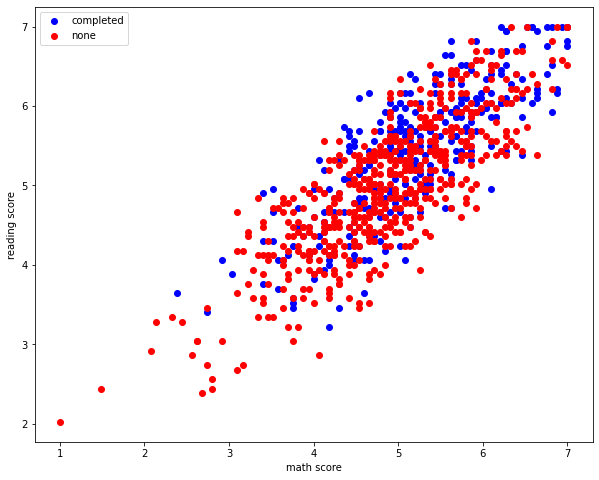

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(df_grades[df_grades["test preparation course"]=="completed"]['math score'], df_grades[df_grades["test preparation course"]=="completed"]['reading score'], 
            c='blue', label='completed')
plt.scatter(df_grades[df_grades["test preparation course"]=="none"]['math score'], df_grades[df_grades["test preparation course"]=="none"]['reading score'],
            c='red', label='none')
plt.xlabel('math score')     
plt.ylabel('reading score')

plt.legend(numpoints=1)
plt.show()

En esta visualización se asume que el dato "None" en la columna "test preparation course" significa que el alumno no terminó el curso.

Considerando este supuesto, En esta visualización se muestra la relación entre las notas de lectura y las notas de matemática, diferenciando por color si el alumno completó el "test preparation course". Se ve que las notas están concentradas entre el 4.0 y el 6.0 aproximadamente. Y no se ve una diferencia significativa entre aquellos que terminaron el curso de preparación y aquellos que no.

Lo que sí se ve es que todos aquellos que tienen notas bajo 3.0 en matemática y lectura no terminaron el curso.
Y son muy pocos los alumnos que terminaron el curso con notas bajo 4.0 

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media1.tenor.com/images/2f7df460196625edc45b8380d158e5ee/tenor.gif?itemid=16669403">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>